In [1]:
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import os
import numpy as np
import pandas as pd
import re
from datetime import date
from datetime import timedelta

In [2]:
def daterange(start_date, end_date): #ciclo su giorni
    for n in range(int((end_date-start_date).days)):
        yield (start_date + timedelta(n))

def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )
def filter_data_time(data,start,end):
    '''
    example of datetime passed as start and end: dt.datetime(2019,5,29,19,0,0).timestamp()
    data should be structured: 'z' axes and 'ts' axes
    '''
    output = {}
    output['z'] = data['z'].values[(data['ts'].values/1000.0)<end]
    output['ts'] = data['ts'].values[(data['ts'].values/1000.0)<end]
    output['z'] = output['z'][(output['ts']/1000.0)>start]
    output['ts'] = output['ts'][(output['ts']/1000.0)>start]
    return output
    

### Import data from local archive. Change it if you want to import from cloud

In [3]:
import os
import sys
start_date=date(2019,4,17)
end_date=date(2019,5,5)
# setup toolbar

sensor = 'S6.1.3'
directory = 'C:/Users/aless/Desktop/Dottorato/ST_projects/Data_installations/'
result1 = []
i = 0
for gg in log_progress([date for date in daterange(start_date,end_date)]):
    y,m,d=(gg.strftime('%Y,%m,%d')).split(",")
    start =y+'-'+ m +'-'+d
    df = pd.read_parquet(directory+'ss335-acc'+start+sensor.replace(".","")+'.parquet')
    df = df.drop(['x','y'],1)
    if i==0:
        result1 = df
        i = 1
    result1 = pd.concat([result1,df])
result1.head()

,z,ts,T,sens_pos
0,-13265,1555459535809,NaN,S6.1.3
0,-13273,1555459535809,NaN,S6.1.3
0,-13257,1555459535809,NaN,S6.1.3
0,-13258,1555459535809,NaN,S6.1.3
0,-13257,1555459535809,NaN,S6.1.3


In [4]:
start_date=date(2019,5,10)
end_date=date(2019,5,14)
# setup toolbar


sensor = 'S6.1.3'
directory = 'C:/Users/aless/Desktop/Dottorato/ST_projects/Data_installations/'
result2 = []
i = 0
for gg in log_progress([date for date in daterange(start_date,end_date)]):
    y,m,d=(gg.strftime('%Y,%m,%d')).split(",")
    start =y+'-'+ m +'-'+d
    df = pd.read_parquet(directory+'ss335-acc'+start+sensor.replace(".","")+'.parquet')
    df = df.drop(['x','y'],1)
    if i==0:
        result2 = df
        i = 1
    result2 = pd.concat([result2,df])
start_date=date(2019,5,21)
end_date=date(2019,5,28)
for gg in log_progress([date for date in daterange(start_date,end_date)]):
    y,m,d=(gg.strftime('%Y,%m,%d')).split(",")
    start =y+'-'+ m +'-'+d
    df = pd.read_parquet(directory+'ss335-acc'+start+sensor.replace(".","")+'.parquet')
    df = df.drop(['x','y'],1)
    if i==0:
        result2 = df
        i = 1
    result2 = pd.concat([result2,df])
result2.head()

,z,ts
0,-13293,1557446873536
0,-13297,1557446873536
0,-13297,1557446873536
0,-13290,1557446873536
0,-13289,1557446873536


In [5]:
import os
import sys
start_date=date(2019,6,24)
end_date=date(2019,7,1)
# setup toolbar

sensor = 'S6.1.3'
directory = 'C:/Users/aless/Desktop/Dottorato/ST_projects/Data_installations/'
result3 = []
i = 0
for gg in log_progress([date for date in daterange(start_date,end_date)]):
    y,m,d=(gg.strftime('%Y,%m,%d')).split(",")
    start =y+'-'+ m +'-'+d
    df = pd.read_parquet(directory+'ss335-acc'+start+sensor.replace(".","")+'.parquet')
    df = df.drop(['x','y'],1)
    if i==0:
        result3 = df
        i = 1
    result3 = pd.concat([result3,df])
result3.head()

,z,ts
0,-13236,1561347553687
0,-13256,1561347553687
0,-13258,1561347553687
0,-13227,1561347553687
0,-13222,1561347553687


### Figures of merits used to evaluate the reconstruction performance

In [6]:
RSNR = lambda x, xr: np.sum(x**2, axis=0)/np.sum((x - xr)**2, axis=0)
ARSNR = lambda x, xr: np.mean(RSNR(x, xr))
RSNRdB = lambda x, xr: 10*np.log10(RSNR(x, xr))
ARSNRdB = lambda x, xr: 10*np.log10(ARSNR(x, xr))

In [7]:
#result1 = result1[::100]
#result2 = result2[::100]
#result3 = result3[::100]


## Verifying the datasets dimensions

In [8]:
print('Post intervention data dimension should be 11 days: ' + str(result2.shape[0]/60/100/60/24) + 'effective days')
print('Pre intervention data dimension should be 18 days: ' + str(result1.shape[0]/60/100/60/24) + 'effective days')
print('Validation data dimension should be 7/8 days: ' + str(result3.shape[0]/60/100/60/24) + 'effective days')


Post intervention data dimension should be 11 days: 10.595133680555556effective days
Pre intervention data dimension should be 18 days: 17.18721840277778effective days
Validation data dimension should be 7/8 days: 0.48486111111111113effective days


### Plotting datasets to check for anomalies

C:\Users\aless\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


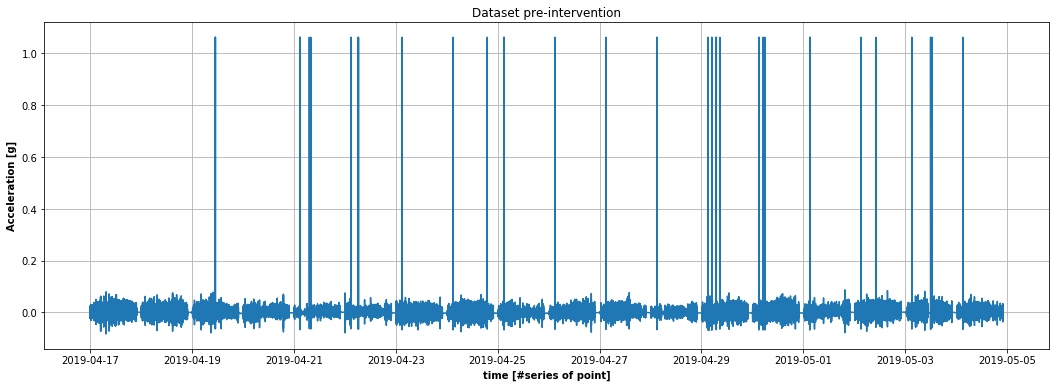

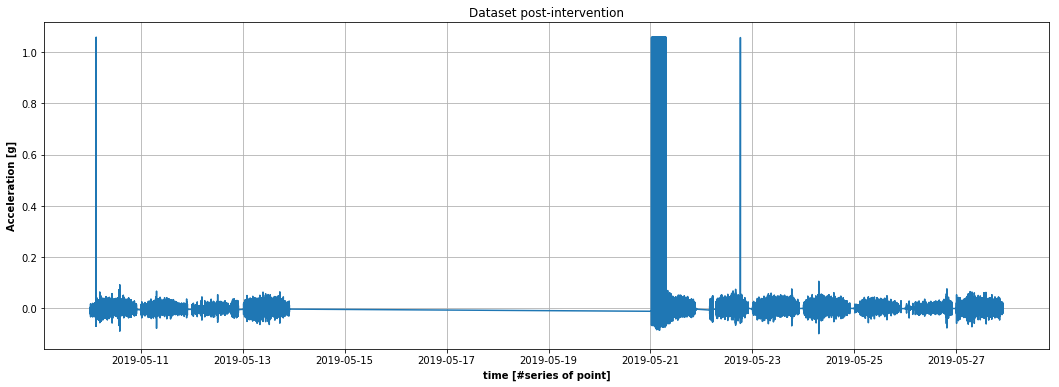

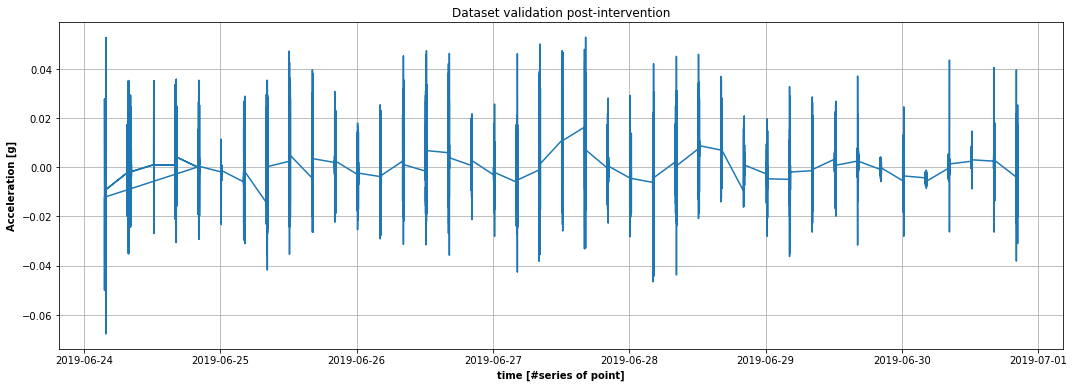

In [8]:
plt.figure(figsize = (18,6))
plt.subplot2grid((1, 1), (0, 0), colspan=1)
#plotting half of the first day: the second half.
conv=(1*2.5)*2**-15
plot1 = result1['z'].values*conv
plot1 = plot1 -np.mean(plot1)
time = np.asarray([dt.datetime.utcfromtimestamp(t/1000) for t in result1['ts'].values])
plt.plot(time, plot1)
plt.grid(which = 'both', axis = 'x')
plt.grid(axis='y')
plt.ylabel('Acceleration [g]', fontsize=10, fontweight='bold')
plt.xlabel('time [#series of point]', fontsize=10, fontweight='bold')
plt.title('Dataset pre-intervention')
plt.show()
plt.figure(figsize = (18,6))
plt.subplot2grid((1, 1), (0, 0), colspan=1)
#plotting half of the first day: the second half.
conv=(1*2.5)*2**-15
plot1 = result2['z'].values*conv
plot1 = plot1 -np.mean(plot1)
time = np.asarray([dt.datetime.utcfromtimestamp(t/1000) for t in result2['ts'].values])
plt.plot(time, plot1)
plt.grid(which = 'both', axis = 'x')
plt.grid(axis='y')
plt.ylabel('Acceleration [g]', fontsize=10, fontweight='bold')
plt.xlabel('time [#series of point]', fontsize=10, fontweight='bold')
plt.title('Dataset post-intervention')
plt.show()

plt.figure(figsize = (18,6))
plt.subplot2grid((1, 1), (0, 0), colspan=1)
#plotting half of the first day: the second half.
conv=(1*2.5)*2**-15
plot1 = result3['z'].values*conv
plot1 = plot1 -np.mean(plot1)
time = np.asarray([dt.datetime.utcfromtimestamp(t/1000) for t in result3['ts'].values])
plt.plot(time, plot1)
plt.grid(which = 'both', axis = 'x')
plt.grid(axis='y')
plt.ylabel('Acceleration [g]', fontsize=10, fontweight='bold')
plt.xlabel('time [#series of point]', fontsize=10, fontweight='bold')
plt.title('Dataset validation post-intervention')
plt.show()

### Filtering of the dataset. 
#### Training dataset composed by the week 21-28 May 2019 (post intervention).
#### Test dataset post intervention composed by 10-14 May 2019.
#### Test dataset pre intervention composed by 19-23 April 2019
##### Considering the same interval of days pre/post intervention to not bias the results by the day


In [9]:
import datetime as dt
start = dt.datetime(2019,5,23,0,0,1).timestamp()
end = dt.datetime(2019,5,28,0,0,0).timestamp()
training_data = filter_data_time(result2,start,end)
start1 = dt.datetime(2019,5,10,0,0,1).timestamp()
end1 = dt.datetime(2019,5,14,0,0,0).timestamp()
test_data_post = filter_data_time(result2,start1,end1)
start3 = dt.datetime(2019,4,19,0,0,1).timestamp()
end3 = dt.datetime(2019,4,23,0,0,0).timestamp()
test_data_pre = filter_data_time(result1,start3,end3)

start4 = dt.datetime(2019,6,24,0,0,1).timestamp()
end4 = dt.datetime(2019,7,1,0,0,0).timestamp()
validation_data = filter_data_time(result3,start4,end4)

test_data_pre['ts'] = test_data_pre['ts'][test_data_pre['z']<-10000]
test_data_pre['z'] = test_data_pre['z'][test_data_pre['z']<-10000]
training_data['ts'] = training_data['ts'][training_data['z']<-10000]
training_data['z'] = training_data['z'][training_data['z']<-10000]
test_data_post['ts'] = test_data_post['ts'][test_data_post['z']<-10000]
test_data_post['z'] = test_data_post['z'][test_data_post['z']<-10000]
validation_data['ts'] = validation_data['ts'][validation_data['z']<-10000]
validation_data['z'] = validation_data['z'][validation_data['z']<-10000]


In [10]:
threshold_RMS = 0.00001

### Creation of a small dataset for plot, conversion to g, and RMS computing. The second half-day (average) of the training week (time series).

C:\Users\aless\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


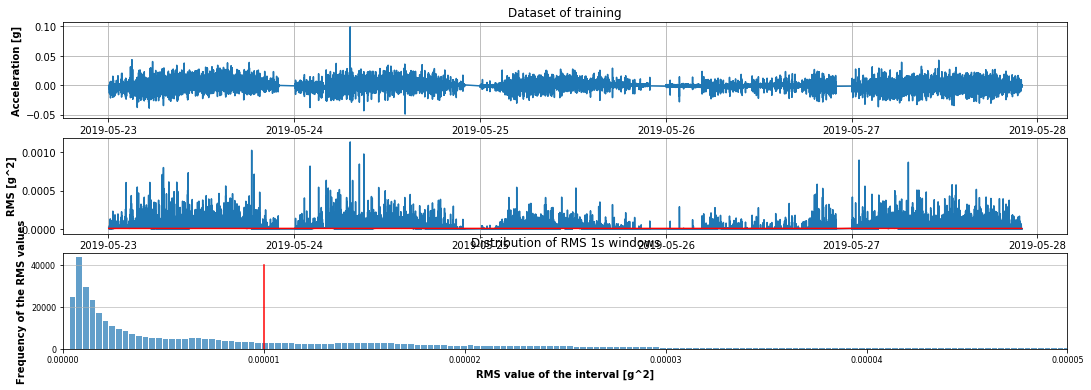

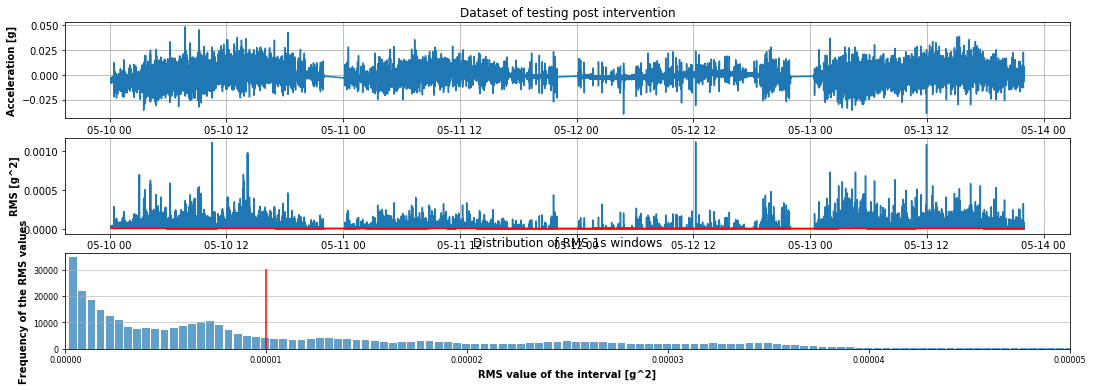

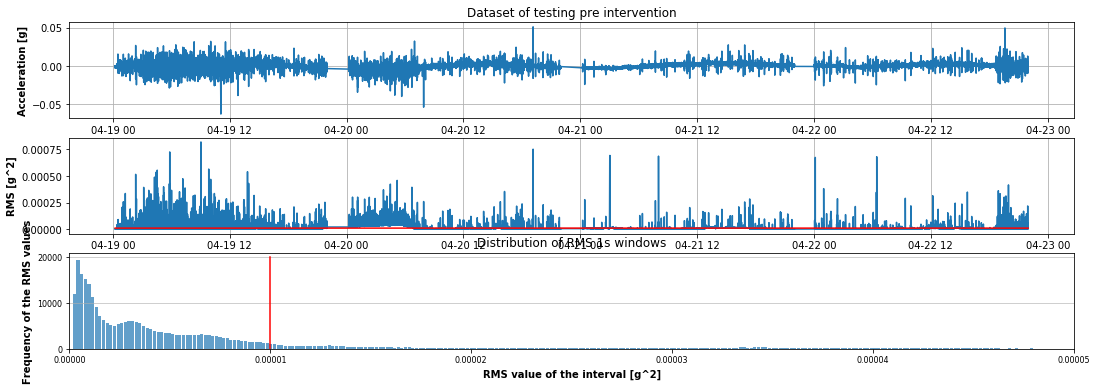

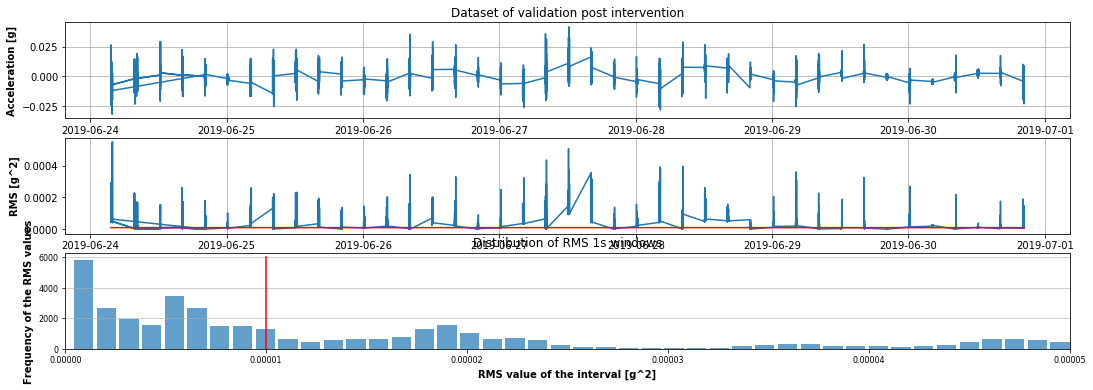

In [11]:
plt.figure(figsize = (18,6))
plt.subplot2grid((3, 1), (0, 0), colspan=1)
#plotting half of the first day: the second half.
conv=(1*2.5)*2**-15
plot1 = training_data['z'][::100]*conv
plot1 = plot1 -np.mean(plot1)
time = np.asarray([dt.datetime.utcfromtimestamp(t/1000) for t in training_data['ts'][::100]])
plt.plot(time, plot1)
plt.grid(which = 'both', axis = 'x')
plt.grid(axis='y')
plt.ylabel('Acceleration [g]', fontsize=10, fontweight='bold')
plt.xlabel('time [#series of point]', fontsize=10, fontweight='bold')
plt.title('Dataset of training')
plt.subplot2grid((3, 1), (1, 0), colspan=1)
d = 100
N = training_data['z'].shape[0]
N0 = N//d
time_series = (training_data['z']- np.mean(training_data['z']))[:N0*d]*conv
time_series = time_series.reshape((N0,d)).T
time_series = time_series
time_series = time_series 
RMS = np.sum(time_series**2,axis=0)/d
plt.plot(time[:N0],RMS)
plt.plot(time[:N0],threshold_RMS*np.ones((N0,1)),'r')
plt.grid(which = 'both', axis = 'x')
plt.ylabel('RMS [g^2]', fontsize=10, fontweight='bold')
plt.xlabel('time [#series of point]', fontsize=10, fontweight='bold')
plt.subplot2grid((3, 1), (2, 0), colspan=1)
        # An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=RMS, bins='auto', color='C0', alpha=0.7, rwidth=0.85)
plt.plot(threshold_RMS*np.ones((2,1)),[0,40000], 'r')
plt.grid(axis='y', alpha=0.75)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel('RMS value of the interval [g^2]',fontsize=10, fontweight='bold')
plt.ylabel('Frequency of the RMS values', fontsize=10, fontweight='bold')
plt.xlim(0, 0.00005)
plt.title("Distribution of RMS 1s windows")
# Set a clean upper y-axis limit.
#plt.ylim(ymax=12000)
plt.show()




plt.figure(figsize = (18,6))
plt.subplot2grid((3, 1), (0, 0), colspan=1)
#plotting half of the first day: the second half.
conv=(1*2.5)*2**-15
plot1 = test_data_post['z'][::100]*conv
plot1 = plot1 -np.mean(plot1)
time = np.asarray([dt.datetime.utcfromtimestamp(t/1000) for t in test_data_post['ts'][::100]])
plt.plot(time, plot1)
plt.grid(which = 'both', axis = 'x')
plt.grid(axis='y')
plt.ylabel('Acceleration [g]', fontsize=10, fontweight='bold')
plt.xlabel('time [#series of point]', fontsize=10, fontweight='bold')
plt.title('Dataset of testing post intervention')
plt.subplot2grid((3, 1), (1, 0), colspan=1)
d = 100
N = test_data_post['z'].shape[0]
N0 = N//d
time_series = (test_data_post['z']- np.mean(test_data_post['z']))[:N0*d]*conv
time_series = time_series.reshape((N0,d)).T
time_series = time_series
time_series = time_series 
RMS = np.sum(time_series**2,axis=0)/d
plt.plot(time[:(N0)],RMS)
plt.plot(time[:(N0)],threshold_RMS*np.ones((N0,1)),'r')
plt.grid(which = 'both', axis = 'x')
plt.ylabel('RMS [g^2]', fontsize=10, fontweight='bold')
plt.xlabel('time [#series of point]', fontsize=10, fontweight='bold')
plt.subplot2grid((3, 1), (2, 0), colspan=1)
        # An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=RMS, bins='auto', color='C0', alpha=0.7, rwidth=0.85)
plt.plot(threshold_RMS*np.ones((2,1)),[0,30000], 'r')
plt.grid(axis='y', alpha=0.75)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel('RMS value of the interval [g^2]',fontsize=10, fontweight='bold')
plt.ylabel('Frequency of the RMS values', fontsize=10, fontweight='bold')
plt.xlim(0, 0.00005)
plt.title("Distribution of RMS 1s windows")
# Set a clean upper y-axis limit.
#plt.ylim(ymax=12000)
plt.show()


plt.figure(figsize = (18,6))
plt.subplot2grid((3, 1), (0, 0), colspan=1)
#plotting half of the first day: the second half.
conv=(1*2.5)*2**-15
plot1 = test_data_pre['z'][::100]*conv
plot1 = plot1 -np.mean(plot1)
time = np.asarray([dt.datetime.utcfromtimestamp(t/1000) for t in test_data_pre['ts'][::100]])
plt.plot(time, plot1)
plt.grid(which = 'both', axis = 'x')
plt.grid(axis='y')
plt.ylabel('Acceleration [g]', fontsize=10, fontweight='bold')
plt.xlabel('time [#series of point]', fontsize=10, fontweight='bold')
plt.title('Dataset of testing pre intervention')
plt.subplot2grid((3, 1), (1, 0), colspan=1)
d = 100
N = test_data_pre['z'].shape[0]
N0 = N//d
time_series = (test_data_pre['z']- np.mean(test_data_pre['z']))[:N0*d]*conv
time_series = time_series.reshape((N0,d)).T
time_series = time_series
time_series = time_series 
RMS = np.sum(time_series**2,axis=0)/d
plt.plot(time[:N0],RMS)
plt.plot(time[:N0],threshold_RMS*np.ones((N0,1)),'r')
plt.grid(which = 'both', axis = 'x')
plt.ylabel('RMS [g^2]', fontsize=10, fontweight='bold')
plt.xlabel('time [#series of point]', fontsize=10, fontweight='bold')
plt.subplot2grid((3, 1), (2, 0), colspan=1)
        # An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=RMS, bins='auto', color='C0', alpha=0.7, rwidth=0.85)
plt.plot(threshold_RMS*np.ones((2,1)),[0,20000], 'r')
plt.grid(axis='y', alpha=0.75)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel('RMS value of the interval [g^2]',fontsize=10, fontweight='bold')
plt.ylabel('Frequency of the RMS values', fontsize=10, fontweight='bold')
plt.xlim(0, 0.00005)
plt.title("Distribution of RMS 1s windows")
# Set a clean upper y-axis limit.
#plt.ylim(ymax=12000)
plt.show()

plt.figure(figsize = (18,6))
plt.subplot2grid((3, 1), (0, 0), colspan=1)
#plotting half of the first day: the second half.
conv=(1*2.5)*2**-15
plot1 = validation_data['z'][::100]*conv
plot1 = plot1 -np.mean(plot1)
time = np.asarray([dt.datetime.utcfromtimestamp(t/1000) for t in validation_data['ts'][::100]])
plt.plot(time, plot1)
plt.grid(which = 'both', axis = 'x')
plt.grid(axis='y')
plt.ylabel('Acceleration [g]', fontsize=10, fontweight='bold')
plt.xlabel('time [#series of point]', fontsize=10, fontweight='bold')
plt.title('Dataset of validation post intervention')
plt.subplot2grid((3, 1), (1, 0), colspan=1)
d = 100
N = validation_data['z'].shape[0]
N0 = N//d
time_series = (validation_data['z']- np.mean(validation_data['z']))[:N0*d]*conv
time_series = time_series.reshape((N0,d)).T
time_series = time_series
time_series = time_series 
RMS = np.sum(time_series**2,axis=0)/d
plt.plot(time[:N0],RMS)
plt.plot(time[:N0],threshold_RMS*np.ones((N0,1)),'r')
plt.grid(which = 'both', axis = 'x')
plt.ylabel('RMS [g^2]', fontsize=10, fontweight='bold')
plt.xlabel('time [#series of point]', fontsize=10, fontweight='bold')
plt.subplot2grid((3, 1), (2, 0), colspan=1)
        # An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=RMS, bins='auto', color='C0', alpha=0.7, rwidth=0.85)
plt.plot(threshold_RMS*np.ones((2,1)),[0,6000], 'r')
plt.grid(axis='y', alpha=0.75)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel('RMS value of the interval [g^2]',fontsize=10, fontweight='bold')
plt.ylabel('Frequency of the RMS values', fontsize=10, fontweight='bold')
plt.xlim(0, 0.00005)
plt.title("Distribution of RMS 1s windows")
# Set a clean upper y-axis limit.
#plt.ylim(ymax=12000)
plt.show()



### Definition of the **valid** dataset, with an automatic threshold setting on the RMS. I use a cross-validation dataset to define this threshold, setting the level of compression and the quality of the signal requested.

In [12]:
# inputs 
d = 100
threshold_in = 10e-10


Training_dataset = training_data['z']*conv
N = training_data['z'].shape[0]
N0 = N//d
Training_dataset = Training_dataset[:N0*d]
Training_dataset = Training_dataset.reshape((N0,d)).T
Training_dataset = Training_dataset - np.mean(Training_dataset, axis=0)
RMS_training = np.sum(Training_dataset**2,axis=0)/d
for increasing_factor in np.arange(1,10):
    threshold = threshold_in*(5**increasing_factor)
    Training_dataset = training_data['z']*conv
    N = training_data['z'].shape[0]
    N0 = N//d
    Training_dataset = Training_dataset[:N0*d]
    Training_dataset = Training_dataset.reshape((N0,d)).T
    Training_dataset = Training_dataset - np.mean(Training_dataset, axis=0)
    RMS_training = np.sum(Training_dataset**2,axis=0)/d
    RMS_training_valid = RMS_training>threshold
    new_dataset = Training_dataset[:,RMS_training_valid]
    print('training set composed by {} instances'.format(Training_dataset.shape[1]))
    print('total valid windows is {} '.format(np.sum(RMS_training_valid)))
    Cx = np.dot(new_dataset, new_dataset.T)/d
    lx, Vx = np.linalg.eigh(Cx)
    lx = lx[::-1]
    Vx = Vx[:,::-1]
    lcumsum = np.cumsum(lx/np.sum(lx))
    k = np.argmax(lcumsum > 0.97)
    k = 20
    Training_dataset = validation_data['z']*conv
    N = validation_data['z'].shape[0]
    N0 = N//d
    Training_dataset = Training_dataset[:N0*d]
    Training_dataset = Training_dataset.reshape((N0,d)).T
    Training_dataset = Training_dataset - np.mean(Training_dataset, axis=0)
    RMS_training = np.sum(Training_dataset**2,axis=0)/d
    RMS_training_valid = RMS_training>threshold
    Training_dataset = Training_dataset[:,RMS_training_valid]
    Xrpca = np.linalg.multi_dot([Vx[:,:k], Vx[:,:k].T, Training_dataset])
    arsnrpca = ARSNRdB(Training_dataset, Xrpca)
    print('ARSNR_PCA = {:.2f}'.format(arsnrpca))
    if arsnrpca > 14:
        print('Valid ARSNR_PCA = {:.2f}, correct threshold = {}'.format(arsnrpca, threshold))
        break
        

training set composed by 395222 instances
total valid windows is 395222 
ARSNR_PCA = 6.71
training set composed by 395222 instances
total valid windows is 395222 
ARSNR_PCA = 6.71
training set composed by 395222 instances
total valid windows is 395222 
ARSNR_PCA = 6.71
training set composed by 395222 instances
total valid windows is 163191 
ARSNR_PCA = 9.80
training set composed by 395222 instances
total valid windows is 42712 
ARSNR_PCA = 14.23
Valid ARSNR_PCA = 14.23, correct threshold = 3.125e-06


In [13]:
k = 20
Training_dataset = test_data_post['z']*conv
N = test_data_post['z'].shape[0]
N0 = N//d
Training_dataset = Training_dataset[:N0*d]
Training_dataset = Training_dataset.reshape((N0,d)).T
Training_dataset = Training_dataset - np.mean(Training_dataset, axis=0)
RMS_training = np.sum(Training_dataset**2,axis=0)/d
RMS_training_valid = RMS_training>threshold
print('training set composed by {} instances'.format(Training_dataset.shape[1]))
print('total valid windows is {} '.format(np.sum(RMS_training_valid)))
Training_dataset = Training_dataset[:,RMS_training_valid]

Xrpca = np.linalg.multi_dot([Vx[:,:k], Vx[:,:k].T, Training_dataset])
arsnrpca = ARSNRdB(Training_dataset, Xrpca)
print('ARSNR_PCA = {:.2f}'.format(arsnrpca))

training set composed by 390365 instances
total valid windows is 36390 
ARSNR_PCA = 16.47


In [14]:
'''
# inputs 
d = 100
threshold_mean = 0.00001
threshold_low = 0.0000004
threshold_high = 0.00005
threshold = 10e-10
Training_dataset = training_data['z']*conv
N = training_data['z'].shape[0]
N0 = N//d
Training_dataset = Training_dataset[:N0*d]
Training_dataset = Training_dataset.reshape((N0,d)).T
Training_dataset = Training_dataset - np.mean(Training_dataset, axis=0)
RMS_training = np.sum(Training_dataset**2,axis=0)/d
RMS_training_valid = RMS_training>threshold
new_dataset = Training_dataset[:,RMS_training_valid]
print('training set composed by {} instances'.format(Training_dataset.shape[1]))
print('total valid windows is {} '.format(np.sum(RMS_training_valid)))
'''

"\n# inputs \nd = 100\nthreshold_mean = 0.00001\nthreshold_low = 0.0000004\nthreshold_high = 0.00005\nthreshold = 10e-10\nTraining_dataset = training_data['z']*conv\nN = training_data['z'].shape[0]\nN0 = N//d\nTraining_dataset = Training_dataset[:N0*d]\nTraining_dataset = Training_dataset.reshape((N0,d)).T\nTraining_dataset = Training_dataset - np.mean(Training_dataset, axis=0)\nRMS_training = np.sum(Training_dataset**2,axis=0)/d\nRMS_training_valid = RMS_training>threshold\nnew_dataset = Training_dataset[:,RMS_training_valid]\nprint('training set composed by {} instances'.format(Training_dataset.shape[1]))\nprint('total valid windows is {} '.format(np.sum(RMS_training_valid)))\n"

### Definition of the eigenvectors needed to achieve a certain amount of energy.

k = 25


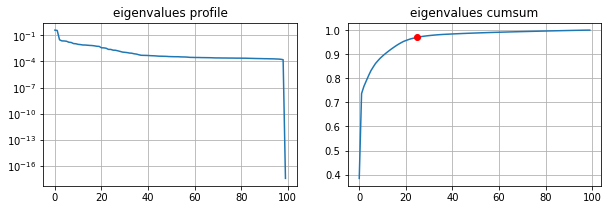

In [15]:
Cx = np.dot(new_dataset, new_dataset.T)/d
lx, Vx = np.linalg.eigh(Cx)
lx = lx[::-1]
Vx = Vx[:,::-1]
lcumsum = np.cumsum(lx/np.sum(lx))
k = np.argmax(lcumsum > 0.97)


print('k = {}'.format(k))

fig, ax = plt.subplots(1, 2, figsize=(10,3))

ax[0].plot(lx/np.sum(lx))
ax[0].set(yscale='log')
ax[0].set(title='eigenvalues profile')
ax[0].grid()

ax[1].plot(np.cumsum(lx/np.sum(lx)))
ax[1].plot(k, lcumsum[k], 'or')
ax[1].set(title='eigenvalues cumsum')
ax[1].grid()
plt.show()

 ### Compression and decompression of the signal to see the RSNR of the algorithm. 16 dB is the one expected with 0.97 energy. We use always K=20 since it is the one setted during the cross validation

In [38]:
mse_w = lambda x, xr: np.mean((x - xr)**2, axis=0)
mse = lambda x, xr: np.mean(mse_w(x, xr))

In [19]:
k = 20
Xrpca = np.linalg.multi_dot([Vx[:,:k], Vx[:,:k].T, new_dataset])
arsnrpca = ARSNRdB(new_dataset, Xrpca)

print('ARSNR_PCA = {:.2f}'.format(arsnrpca))
arsnrpca = mse(new_dataset, Xrpca)

print('mse = {:.8f}'.format(arsnrpca))

ARSNR_PCA = 14.88
mse = 0.00000165


## Automatic definition of the threshold --> Requirement: compression factor = 5 and ARSNR = 16 dB

### Redefinition of the function to loop on hours

In [20]:
import time
def daterange(start_date, end_date): #ciclo su giorni
    for n in range(int((end_date-start_date).days)*24):
        yield (dt.datetime.utcfromtimestamp(time.mktime(start_date.timetuple())).timestamp() + 3600*n)

### Assessing quality of reconstruction on 1 week before intervention, hour x hour.

In [39]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
sumASNR = 0
start_date=date(2019,4,19)
end_date=date(2019,4,23)
arsnrpca_valid = []
date_valid = []
mse_valid = []
for d_index in log_progress([date for date in daterange(start_date,end_date)]):
    start = test_data_pre['ts']/1000>d_index
    end = test_data_pre['ts']/1000<(d_index+60*60)
    Test_pre = test_data_pre['z'][ start & end]*conv
    if Test_pre.shape[0]>0:
        N = Test_pre.shape[0]
        N0 = N//d
        Test_pre = Test_pre[:N0*d]
        Test_pre = Test_pre.reshape((N0,d)).T
        Test_pre = Test_pre - np.mean(Test_pre, axis=0)
        RMS_test = np.sum(Test_pre**2,axis=0)/d
        RMS_test_valid = RMS_test>threshold
        Test_pre = Test_pre[:,RMS_test_valid]
        Test_pre = sklearn.preprocessing.scale(Test_pre, axis=0, with_mean=True, with_std=True, copy=True)
        Xrpca = np.linalg.multi_dot([Vx[:,:k], Vx[:,:k].T, Test_pre])
        arsnrpca = ARSNRdB(Test_pre, Xrpca)
        mse_valid.append(mse(Test_pre, Xrpca))
        arsnrpca_valid.append(arsnrpca)
        date_valid.append(d_index)


In [40]:
np.asarray(arsnrpca_valid).shape

(86,)

### Assessing quality of reconstruction on 1 week after intervention, hour x hour.

In [41]:

sumASNR = 0
start_date=date(2019,5,10)
end_date=date(2019,5,14)
arsnrpca_valid2 = []
date_valid2 = []
mse_valid2 = []
for d_index in log_progress([date for date in daterange(start_date,end_date)]):
    start = test_data_post['ts']/1000>d_index
    end = test_data_post['ts']/1000<(d_index+60*60)
    Test_pre = test_data_post['z'][ start & end]*conv
    if Test_pre.shape[0]>0:
        N = Test_pre.shape[0]
        N0 = N//d
        Test_pre = Test_pre[:N0*d]
        Test_pre = Test_pre.reshape((N0,d)).T
        Test_pre = Test_pre - np.mean(Test_pre, axis=0)
        RMS_test = np.sum(Test_pre**2,axis=0)/d
        RMS_test_valid = RMS_test>threshold
        Test_pre = Test_pre[:,RMS_test_valid]
        Test_pre = sklearn.preprocessing.scale(Test_pre, axis=0, with_mean=True, with_std=True, copy=True)
        Xrpca = np.linalg.multi_dot([Vx[:,:k], Vx[:,:k].T, Test_pre])
        arsnrpca = ARSNRdB(Test_pre, Xrpca)
        mse_valid2.append(mse(Test_pre, Xrpca))
        arsnrpca_valid2.append(arsnrpca)
        date_valid2.append(d_index)


In [42]:
np.asarray(arsnrpca_valid2).shape

(86,)

In [43]:
%matplotlib widget
plt.figure(figsize=(16,3))
arsnrpca_valid = np.asarray(mse_valid)[~np.isnan(np.asarray(mse_valid))]
date_valid = np.asarray(date_valid)
plt.plot(date_valid, arsnrpca_valid, color = 'C0', label = 'pre_intervention')
N = 24
cumsum, moving_aves = [0], []

for i, x in enumerate(arsnrpca_valid, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)

plt.plot(date_valid[23:],moving_aves,'--', color = 'C0', linewidth = 3)   

N = 24
arsnrpca_valid2 = np.asarray(mse_valid2)[~np.isnan(np.asarray(mse_valid2))]
date_valid2 = np.asarray(date_valid2-(date_valid2[0]-date_valid[-1]))
cumsum, moving_aves = [0], []
for i, x in enumerate(arsnrpca_valid2, 1):
    if np.isnan(x)==0:
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
plt.plot(date_valid2[23:],moving_aves,'--', linewidth = 3, color = 'C1', label = 'moving mean')   

plt.plot(date_valid2,np.asarray(arsnrpca_valid2), color = 'C1', label = 'after_intervention')
plt.grid(which = 'both', axis = 'both')
plt.ylabel('mean square error', fontsize=10, fontweight='bold')
plt.xlabel('time [#series of point]', fontsize=10, fontweight='bold')
plt.ylim(ymax=0.15)
plt.ylim(ymin=0.04)

plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Autoencoders from here

In [27]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import keras
from keras.optimizers import SGD,Adam
import math
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, BatchNormalization, LSTM, RepeatVector, Flatten
from keras.models import Model
from keras.models import model_from_json
from keras import regularizers
import datetime
import time
import requests as req
import json
import pandas as pd
import pickle
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [28]:
import sklearn
new_dataset = sklearn.preprocessing.scale(new_dataset, axis=0, with_mean=True, with_std=True, copy=True)
X_train, X_test = train_test_split(new_dataset.T.reshape(new_dataset.T.shape[0],new_dataset.T.shape[1]), test_size=0.2, random_state=1)
X_train = X_train
X_test = X_test
X_train.shape

(34169, 100)

In [29]:
input_dim = X_train.shape[1]
encoding_dim = 20
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="linear")(input_layer)
decoder = Dense(input_dim, activation='linear')(encoder)
autoencoder2 = Model(inputs=input_layer, outputs=decoder)
autoencoder2.summary()




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2100      
Total params: 4,120
Trainable params: 4,120
Non-trainable params: 0
_________________________________________________________________


In [30]:
#autoencoder2.layers[1].set_weights([np.asarray(Vx[:,:20]),np.zeros((20,))])
#autoencoder2.layers[2].set_weights([np.asarray(Vx[:,:20].T),np.zeros((100,))])
#autoencoder2.layers[2].get_weights()[0]

In [31]:
nb_epoch = 80
batch_size = 1024

def step_decay(epoch):
    initial_lrate = 1e-1
    drop = 0.1
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

adam = Adam(lr=1e-2, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
lrCallBack = keras.callbacks.LearningRateScheduler(step_decay)

autoencoder2.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mse'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder2.fit(X_train,X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[tensorboard, lrCallBack]).history




Train on 34169 samples, validate on 8543 samples


Epoch 1/80
34169/34169 [==============================] - ETA: 4s - loss: 1.4832 - mean_squared_error: 1.48 - ETA: 0s - loss: 6.1409 - mean_squared_error: 6.14 - ETA: 0s - loss: 3.3856 - mean_squared_error: 3.38 - 0s 9us/step - loss: 2.8413 - mean_squared_error: 2.8413 - val_loss: 0.3880 - val_mean_squared_error: 0.3880
Epoch 2/80
34169/34169 [==============================] - ETA: 0s - loss: 0.3838 - mean_squared_error: 0.38 - ETA: 0s - loss: 0.3311 - mean_squared_error: 0.33 - ETA: 0s - loss: 0.2856 - mean_squared_error: 0.28 - 0s 4us/step - loss: 0.2775 - mean_squared_error: 0.2775 - val_loss: 0.2013 - val_mean_squared_error: 0.2013
Epoch 3/80
34169/34169 [==============================] - ETA: 0s - loss: 0.1944 - mean_squared_error: 0.19 - ETA: 0s - loss: 0.1843 - mean_squared_error: 0.18 - ETA: 0s - loss: 0.1752 - mean_squared_error: 0.17 - 0s 4us/step - loss: 0.1729 - mean_squared_error: 0.1729 - val_loss: 0.1530 - val_mean_sq

In [32]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');
#plt.ylim(ymax=0.1, ymin = 0)
plt.yscale('log')
print('Validation accuracy [mse] = %.2f' % (history['val_loss'][-1]))

Validation accuracy [mse] = 0.10


In [47]:
sumASNR = 0
start_date=date(2019,4,19)
end_date=date(2019,4,23)
arsnrpca_valid_encoder = []
date_valid_encoder = []
d = 100
for d_index in log_progress([date for date in daterange(start_date,end_date)]):
    start = test_data_pre['ts']/1000>d_index
    end = test_data_pre['ts']/1000<(d_index+60*60)
    Test_pre = test_data_pre['z'][ start & end]*conv
    if Test_pre.shape[0]>0:
        N = Test_pre.shape[0]
        N0 = N//d
        Test_pre = Test_pre[:N0*d]
        Test_pre = Test_pre.reshape((N0,d)).T
        Test_pre = Test_pre - np.mean(Test_pre, axis=0)
        RMS_test = np.sum(Test_pre**2,axis=0)/d
        RMS_test_valid = RMS_test>threshold
        Test_pre = Test_pre[:,RMS_test_valid]
        if Test_pre.shape[1]>0:
            prova = sklearn.preprocessing.scale(Test_pre, axis=0, with_mean=True, with_std=True, copy=True)
            predictions = autoencoder2.predict(prova.T)
            #plt.plot(prova[0,:])
            #plt.plot(predictions[0,:])
            #plt.show()
            mse = np.mean(np.power(prova.T - predictions, 2), axis=1)
            #import pdb;pdb.set_trace()
            #mse = ARSNRdB(prova, predictions)
            arsnrpca_valid_encoder.append(np.mean(mse))
            date_valid_encoder.append(d_index)

sumASNR = 0
start_date=date(2019,5,10)
end_date=date(2019,5,14)
arsnrpca_valid2_encoder = []
date_valid2_encoder = []
for d_index in log_progress([date for date in daterange(start_date,end_date)]):
    start = test_data_post['ts']/1000>d_index
    end = test_data_post['ts']/1000<(d_index+60*60)
    Test_pre = test_data_post['z'][ start & end]*conv
    if Test_pre.shape[0]>0:
        N = Test_pre.shape[0]
        N0 = N//d
        Test_pre = Test_pre[:N0*d]
        Test_pre = Test_pre.reshape((N0,d)).T
        Test_pre = Test_pre - np.mean(Test_pre, axis=0)
        RMS_test = np.sum(Test_pre**2,axis=0)/d
        RMS_test_valid = RMS_test>threshold
        Test_pre = Test_pre[:,RMS_test_valid]
        if Test_pre.shape[1]>0:
            prova = sklearn.preprocessing.scale(Test_pre, axis=0, with_mean=True, with_std=True, copy=True)
            predictions = autoencoder2.predict(prova.T)
            mse = np.mean(np.power(prova.T - predictions, 2), axis=1)
            #mse = ARSNRdB(prova, predictions)
        arsnrpca_valid2_encoder.append(np.mean(mse))
        date_valid2_encoder.append(d_index)


In [49]:
%matplotlib widget
plt.figure(figsize=(16,3))
arsnrpca_valid = np.asarray(arsnrpca_valid_encoder)[~np.isnan(np.asarray(arsnrpca_valid_encoder))]
date_valid = np.asarray(date_valid_encoder)
plt.plot(date_valid, arsnrpca_valid, color = 'C0', label = 'pre_intervention')
N = 24
cumsum, moving_aves = [0], []

for i, x in enumerate(arsnrpca_valid, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)

plt.plot(date_valid[23:],moving_aves,'--', color = 'C0', linewidth = 3)   

N = 24
arsnrpca_valid2 = np.asarray(arsnrpca_valid2_encoder)[~np.isnan(np.asarray(arsnrpca_valid2_encoder))]
date_valid2 = np.asarray(date_valid2_encoder-(date_valid2_encoder[0]-date_valid[-1]))
cumsum, moving_aves = [0], []
for i, x in enumerate(arsnrpca_valid2, 1):
    if np.isnan(x)==0:
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
plt.plot(date_valid2[23:],moving_aves,'--', linewidth = 3, color = 'C1', label = 'moving mean')   

plt.plot(date_valid2,np.asarray(arsnrpca_valid2), color = 'C1', label = 'after_intervention')
plt.grid(which = 'both', axis = 'both')
plt.ylabel('mean square error', fontsize=10, fontweight='bold')
plt.xlabel('time [#series of point]', fontsize=10, fontweight='bold')
plt.ylim(ymax = 0.15) 
plt.ylim(ymin = 0.04) 
#plt.axhline(y = 0.105,linewidth=3, color='#d62728')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [102]:
'''
input_dim = X_train.shape[1]
encoding_dim = 60
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation='sigmoid', 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder1 = Dense(int(encoding_dim / 2), activation='sigmoid')(encoder)
decoder1 = Dense(int(encoding_dim ), activation='sigmoid')(encoder1)
decoder2 = Dense(input_dim, activation='linear')(decoder1)
autoencoder = Model(inputs=input_layer, outputs=decoder2)
autoencoder.summary()
'''

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 100)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_54 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_55 (Dense)             (None, 60)                1860      
_________________________________________________________________
dense_56 (Dense)             (None, 100)               6100      
Total params: 15,850
Trainable params: 15,850
Non-trainable params: 0
_________________________________________________________________


## Second autoencoder

In [180]:
import sklearn
new_dataset = sklearn.preprocessing.scale(new_dataset, axis=0, with_mean=True, with_std=True, copy=True)
X_train, X_test = train_test_split(new_dataset.T.reshape(new_dataset.T.shape[0],new_dataset.T.shape[1],1), test_size=0.2, random_state=1)
X_train = X_train
X_test = X_test
X_train.shape

(34169, 100, 1)

In [190]:
window_length = X_train.shape[1]
#encoding_dim = 60
input_window = Input(shape=(window_length,1))
x = Conv1D(16, 3, activation="sigmoid", padding="same")(input_window) # 10 dims
x = BatchNormalization()(x)
x = MaxPooling1D(2, padding="same")(x) # 5 dims
x = Conv1D(1, 7, activation="sigmoid", padding="same")(x) # 5 dims
x = BatchNormalization()(x)
encoded = MaxPooling1D(2, padding="same")(x) # 3 dims

encoder = Model(input_window, encoded)

# 3 dimensions in the encoded layer

x = Conv1D(1, 7, activation="sigmoid", padding="same")(encoded) # 3 dims
x = BatchNormalization()(x)
x = UpSampling1D(2)(x) # 6 dims
x = Conv1D(16, 2, activation='sigmoid',padding="same")(x) # 5 dims
x = BatchNormalization()(x)
x = UpSampling1D(2)(x) # 10 dims
decoded = Conv1D(1, 3, activation='linear', padding='same')(x) # 10 dims
autoencoder = Model(input_window, decoded)
autoencoder.summary()


Model: "model_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_55 (InputLayer)        (None, 100, 1)            0         
_________________________________________________________________
conv1d_87 (Conv1D)           (None, 100, 1)            6         
_________________________________________________________________
batch_normalization_71 (Batc (None, 100, 1)            4         
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 50, 1)             0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_97 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_98 (Dense)             (None, 100)               210

Train on 34169 samples, validate on 8543 samples
Epoch 1/100
34169/34169 [==============================] - ETA: 2:24 - loss: 1.0729 - mean_squared_error: 1.07 - ETA: 35s - loss: 1.0744 - mean_squared_error: 1.0744 - ETA: 19s - loss: 1.0732 - mean_squared_error: 1.073 - ETA: 13s - loss: 1.0725 - mean_squared_error: 1.072 - ETA: 10s - loss: 1.0721 - mean_squared_error: 1.072 - ETA: 7s - loss: 1.0717 - mean_squared_error: 1.071 - ETA: 6s - loss: 1.0711 - mean_squared_error: 1.07 - ETA: 5s - loss: 1.0706 - mean_squared_error: 1.07 - ETA: 4s - loss: 1.0703 - mean_squared_error: 1.07 - ETA: 3s - loss: 1.0698 - mean_squared_error: 1.06 - ETA: 3s - loss: 1.0693 - mean_squared_error: 1.06 - ETA: 2s - loss: 1.0688 - mean_squared_error: 1.06 - ETA: 2s - loss: 1.0683 - mean_squared_error: 1.06 - ETA: 1s - loss: 1.0677 - mean_squared_error: 1.06 - ETA: 1s - loss: 1.0671 - mean_squared_error: 1.06 - ETA: 1s - loss: 1.0664 - mean_squared_error: 1.06 - ETA: 1s - loss: 1.0659 - mean_squared_error: 1.0

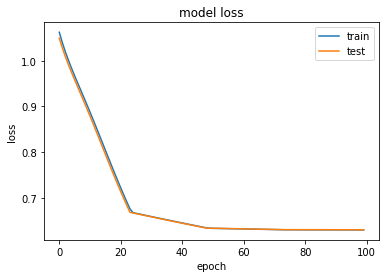

In [191]:
nb_epoch = 100
batch_size = 512

def step_decay(epoch):
    initial_lrate = 1e-2
    drop = 0.1
    epochs_drop = 25.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

adam = Adam(lr=1e-2, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
lrCallBack = keras.callbacks.LearningRateScheduler(step_decay)

autoencoder.compile(optimizer='sgd', 
                    loss='mean_squared_error', 
                    metrics=['mse'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train,X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[tensorboard, lrCallBack]).history
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');
#plt.ylim(ymax=0.00005)
#plt.yscale('log')


In [123]:
sumASNR = 0
start_date=date(2019,4,19)
end_date=date(2019,4,23)
arsnrpca_valid = []
date_valid = []
d = 100
for d_index in log_progress([date for date in daterange(start_date,end_date)]):
    start = test_data_pre['ts']/1000>d_index
    end = test_data_pre['ts']/1000<(d_index+60*60)
    Test_pre = test_data_pre['z'][ start & end]*conv
    if Test_pre.shape[0]>0:
        N = Test_pre.shape[0]
        N0 = N//d
        Test_pre = Test_pre[:N0*d]
        Test_pre = Test_pre.reshape((N0,d)).T
        Test_pre = Test_pre - np.mean(Test_pre, axis=0)
        RMS_test = np.sum(Test_pre**2,axis=0)/d
        RMS_test_valid = RMS_test>threshold
        Test_pre = Test_pre[:,RMS_test_valid]
        if Test_pre.shape[1]>0:
            prova = sklearn.preprocessing.scale(Test_pre.T, axis=0, with_mean=True, with_std=True, copy=True)
            predictions = autoencoder.predict(prova.reshape(prova.shape[0],prova.shape[1],1))
            #plt.plot(prova[0,:])
            #plt.plot(predictions[0,:])
            #plt.show()
            #mse = np.mean(np.power(prova - predictions[:,:,0], 2), axis=1)
            mse = ARSNRdB(prova, predictions[:,:,0])
            #import pdb;pdb.set_trace()
            arsnrpca_valid.append(np.mean(mse))
            date_valid.append(d_index)

sumASNR = 0
start_date=date(2019,5,10)
end_date=date(2019,5,14)
arsnrpca_valid2 = []
date_valid2 = []
for d_index in log_progress([date for date in daterange(start_date,end_date)]):
    start = test_data_post['ts']/1000>d_index
    end = test_data_post['ts']/1000<(d_index+60*60)
    Test_pre = test_data_post['z'][ start & end]*conv
    if Test_pre.shape[0]>0:
        N = Test_pre.shape[0]
        N0 = N//d
        Test_pre = Test_pre[:N0*d]
        Test_pre = Test_pre.reshape((N0,d)).T
        Test_pre = Test_pre - np.mean(Test_pre, axis=0)
        RMS_test = np.sum(Test_pre**2,axis=0)/d
        RMS_test_valid = RMS_test>threshold
        Test_pre = Test_pre[:,RMS_test_valid]
        if Test_pre.shape[1]>0:
            prova = sklearn.preprocessing.scale(Test_pre.T, axis=0, with_mean=True, with_std=True, copy=True)
            predictions = autoencoder.predict(prova.reshape(prova.shape[0],prova.shape[1],1))
            #mse = np.mean(np.power(prova - predictions[:,:,0], 2), axis=1)
            mse = ARSNRdB(prova, predictions[:,:,0])
        arsnrpca_valid2.append(np.mean(mse))
        date_valid2.append(d_index)


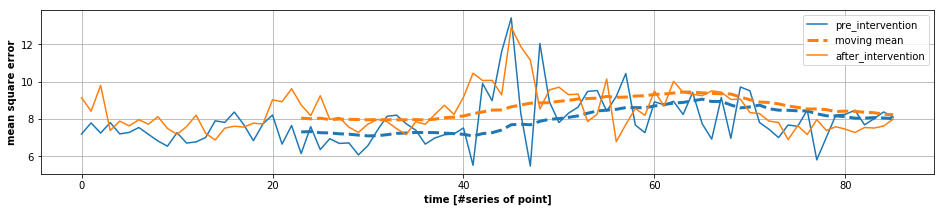

In [124]:
plt.figure(figsize=(16,3))
arsnrpca_valid = np.asarray(arsnrpca_valid)#[~np.isnan(np.asarray(arsnrpca_valid))]
plt.plot(np.arange(arsnrpca_valid.shape[0]),arsnrpca_valid, color = 'C0', label = 'pre_intervention')
N = 24
cumsum, moving_aves = [0], []

for i, x in enumerate(arsnrpca_valid, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)

plt.plot(np.arange(23,arsnrpca_valid.shape[0]),moving_aves,'--', color = 'C0', linewidth = 3)   

N = 24
arsnrpca_valid2 = np.asarray(arsnrpca_valid2)[~np.isnan(np.asarray(arsnrpca_valid2))]
cumsum, moving_aves = [0], []
for i, x in enumerate(arsnrpca_valid2, 1):
    if np.isnan(x)==0:
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
plt.plot(np.arange(23,arsnrpca_valid2.shape[0]),moving_aves,'--', linewidth = 3, color = 'C1', label = 'moving mean')   

plt.plot(np.arange(arsnrpca_valid2.shape[0]),np.asarray(arsnrpca_valid2), color = 'C1', label = 'after_intervention')
plt.grid(which = 'both', axis = 'both')
plt.ylabel('mean square error', fontsize=10, fontweight='bold')
plt.xlabel('time [#series of point]', fontsize=10, fontweight='bold')
#plt.ylim(ymax = 0.2)
plt.legend()